In [470]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os # makes you access your files on hard drive outside the folder


Client_id: Unique id for client
District: District where the client is
Client_catg: Category client belongs to
Region: Area where the client is
Creation_date: Date client joined
Target: fraud:1 , not fraud: 0
Invoice data

Client_id: Unique id for the client
Invoice_date: Date of the invoice
Tarif_type: Type of tax
Counter_number:
Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
Counter_code:
Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
Consommation_level_1: Consumption_level_1
Consommation_level_2: Consumption_level_2
Consommation_level_3: Consumption_level_3
Consommation_level_4: Consumption_level_4
Old_index: Old index
New_index: New index
Months_number: Month number
Counter_type: Type of counter

In [471]:
df_client = pd.read_csv('data/client_train.csv')
df_invoice = pd.read_csv('data/invoice_train.csv')

In [472]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [473]:
df_client.creation_date.unique()

array(['31/12/1994', '29/05/2002', '13/03/1986', ..., '16/08/2004',
       '30/08/1978', '25/05/1978'], dtype=object)

In [474]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [475]:
df_invoice.reading_remarque.unique()

array([  8,   6,   9,   7, 207, 413, 203,   5])

In [476]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [477]:
df = pd.merge(df_client, df_invoice, how='right', on='client_id')

In [478]:
df.describe()

,disrict,client_catg,region,target,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,6.348246e+01,1.194381e+01,2.103584e+02,7.887688e-02,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,3.273403e+00,6.022452e+00,1.035828e+02,2.695465e-01,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,6.000000e+01,1.100000e+01,1.010000e+02,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.100000e+01,1.030000e+02,0.000000e+00,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,6.200000e+01,1.100000e+01,3.010000e+02,0.000000e+00,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,6.300000e+01,1.100000e+01,3.090000e+02,0.000000e+00,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,6.900000e+01,5.100000e+01,3.990000e+02,1.000000e+00,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [479]:
df.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [480]:
df.head()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC


<Axes: xlabel='months_number', ylabel='Count'>

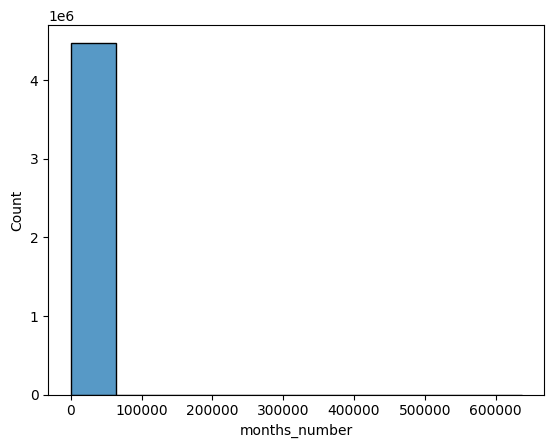

In [481]:
sns.histplot(df.months_number, bins=10)

<Axes: ylabel='Count'>

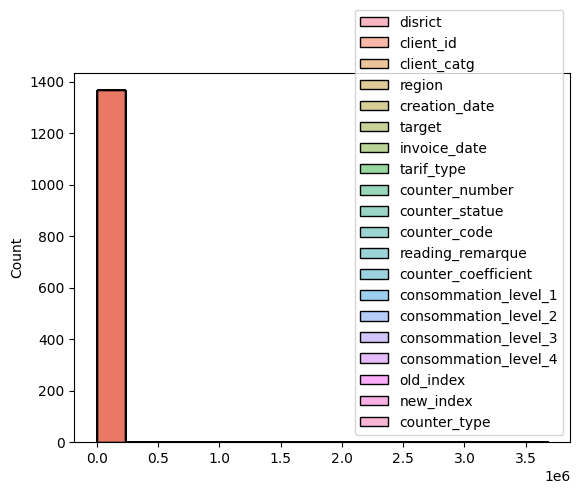

In [482]:
df_months = df.groupby('months_number').count()
sns.histplot(df_months)

In [483]:
from scipy.stats import zscore, boxcox

<Axes: xlabel='months_number', ylabel='Count'>

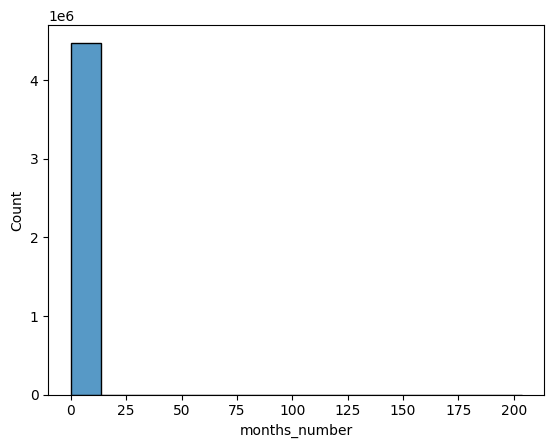

In [484]:
months_zscore  = zscore(df.months_number)
sns.histplot(months_zscore, bins= 15)

In [485]:
mask = df.months_number > 180
drop_months = df[mask].index
df.drop(drop_months, inplace=True)

In [486]:
df.months_number.max()

130

In [487]:
df.iloc[3691041, :]

disrict                                 69
client_id               train_Client_78752
client_catg                             11
region                                 103
creation_date                   30/04/2014
target                                 0.0
invoice_date                    2016-01-09
tarif_type                              40
counter_number                      466795
counter_statue                           0
counter_code                             5
reading_remarque                         8
counter_coefficient                      1
consommation_level_1                    81
consommation_level_2                     0
consommation_level_3                     0
consommation_level_4                     0
old_index                             1744
new_index                             1825
months_number                            4
counter_type                           GAZ
Name: 3692358, dtype: object

In [488]:
df['difference_index'] = df['new_index'] - df['old_index'] /df['months_number']

In [489]:
df.difference_index.describe()

count    4.475337e+06
mean     1.137228e+04
std      1.856923e+04
min     -9.985390e+05
25%      1.445000e+03
50%      5.631000e+03
75%      1.572900e+04
max      1.743970e+06
Name: difference_index, dtype: float64

<Axes: xlabel='difference_index', ylabel='Count'>

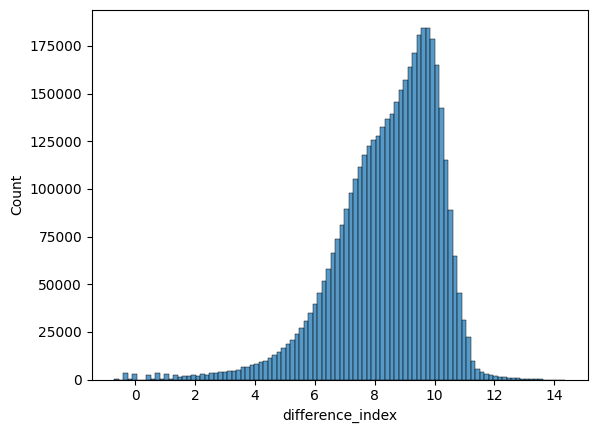

In [490]:
sns.histplot(np.log(df.difference_index), bins=100)

In [491]:
df[df['difference_index'] < 0 ]

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,difference_index
1120,60,train_Client_100024,11,101,22/03/1985,0.0,2014-06-20,11,482429,0,...,1,800,400,318,0,99260,778,4,ELEC,-24037.000
2818,63,train_Client_10008,11,101,14/09/1987,0.0,2015-05-01,11,842528,0,...,1,800,400,800,363,99486,1849,4,ELEC,-23022.500
5751,60,train_Client_100157,11,101,11/07/2011,0.0,2018-12-02,11,35572,0,...,1,800,400,800,4086,97099,3185,4,ELEC,-21089.750
9104,60,train_Client_100257,11,101,01/10/2007,0.0,2011-01-06,10,7292038,0,...,1,200,421,0,0,9946,567,4,ELEC,-1919.500
20153,69,train_Client_100549,11,104,15/05/1992,0.0,2006-09-21,11,37721,0,...,1,1200,338,0,0,98483,21,4,ELEC,-24599.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458606,69,train_Client_99506,11,104,08/09/1998,0.0,2019-04-15,11,14604,0,...,1,1600,800,1600,1823,97232,3055,8,ELEC,-9099.000
4461423,62,train_Client_99580,12,309,19/06/1990,0.0,2011-03-25,11,10907,0,...,1,1200,1518,0,0,99336,2054,4,ELEC,-22780.000
4461805,60,train_Client_9959,11,101,14/05/1981,0.0,2010-06-18,11,1167412,0,...,1,1200,1491,0,0,98382,1073,4,ELEC,-23522.500
4466699,69,train_Client_99733,11,104,20/01/1986,0.0,2012-03-04,11,800241,0,...,1,4800,3079,0,0,92306,185,16,ELEC,-5584.125


In [492]:
#Counter statue is weird lets drop all values which are not 1-5 and make them 6 like this we can stil use the information but we do not have the unnecessary unusable details 
conf_values = [769, '0', '5', '1', '4', 'A', 618, 269375, 46,
       420]
df.counter_statue = df.counter_statue.replace(conf_values, 6)

In [493]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%d/%m/%Y').astype(int)
df.creation_date

0          788832000000000000
1          788832000000000000
2          788832000000000000
3          788832000000000000
4          788832000000000000
                  ...        
4476744    756518400000000000
4476745    756518400000000000
4476746    509068800000000000
4476747    509068800000000000
4476748    509068800000000000
Name: creation_date, Length: 4475339, dtype: int64

In [494]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y').astype(int)

In [495]:
df.invoice_date

0          1395619200000000000
1          1364515200000000000
2          1427068800000000000
3          1436745600000000000
4          1479340800000000000
                  ...         
4476744    1124409600000000000
4476745    1134950400000000000
4476746     843609600000000000
4476747     833241600000000000
4476748     822528000000000000
Name: invoice_date, Length: 4475339, dtype: int64

In [496]:
# some columns can be reduced to int8, to save memory.
df.counter_coefficient = df.counter_coefficient.astype('int8')
df.months_number = df.months_number.astype('int16')
df.consommation_level_4 = df.consommation_level_4.astype('int32')
df.consommation_level_3 = df.consommation_level_3.astype('int32')
df.consommation_level_2 = df.consommation_level_2.astype('int32')
df.consommation_level_1 = df.consommation_level_1.astype('int32')

In [497]:
# now I have an idea of the data and therfor I will split now into train and test set 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict

In [498]:
df.drop(['invoice_date', 'creation_date'], axis=1, inplace=True)

In [499]:
y = df.target
x = df.drop(['target', 'client_id', 'difference_index'], axis=1)

In [500]:
cat_features = ['counter_type']
num_cat_features = ['disrict', 'client_catg', 'region', 'tarif_type', 'counter_number',
       'counter_statue', 'reading_remarque','months_number']

date_feature = ['creation_date', 'invoice_date']

num_features =['disrict', 'client_catg', 'region', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code','reading_remarque', 'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number',]

In [501]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

In [502]:
x_train.shape

(3356504, 17)

In [503]:
df.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'target', 'tarif_type',
       'counter_number', 'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'difference_index'],
      dtype='object')

In [504]:
#the num_cat features we don't have to scale because they are categorical but the cat features should become dummy variables 

In [505]:
# Lets first convert the counter type into a dummy variable 

dummy_train = pd.get_dummies(x_train['counter_type'], dtype='int', drop_first=True)
#dummy_train.replace({'True': 1, 'False':0})
x_train_1 = pd.concat([dummy_train, x_train.drop('counter_type', axis=1)], axis=1)
x_train_1.sort_index(inplace=True)

dummy_test = pd.get_dummies(x_test['counter_type'], dtype='int', drop_first=True)
x_test_1 = pd.concat([dummy_test, x_test.drop('counter_type', axis=1)], axis=1)
x_test_1.sort_index(inplace=True)

In [506]:
x_train_1.shape

(3356504, 17)

In [507]:
x_train_1.head()

,GAZ,disrict,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,0,60,11,101,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4
1,0,60,11,101,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4
2,0,60,11,101,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4
3,0,60,11,101,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4
5,0,60,11,101,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8


In [508]:
x_train_1.isnull().value_counts()

GAZ    disrict  client_catg  region  tarif_type  counter_number  counter_statue  counter_code  reading_remarque  counter_coefficient  consommation_level_1  consommation_level_2  consommation_level_3  consommation_level_4  old_index  new_index  months_number
False  False    False        False   False       False           False           False         False             False                False                 False                 False                 False                 False      False      False            3356504
Name: count, dtype: int64

In [509]:
# now we can scale all the numerical variables 
scale = MinMaxScaler()
x_train_scaled = pd.DataFrame(scale.fit_transform(x_train[num_features]),columns=num_features)
x_test_scaled = pd.DataFrame(scale.transform(x_test[num_features]),columns=num_features)

In [510]:
x_train_scaled.shape

(3356504, 16)

In [511]:
x_train_scaled.head()

,disrict,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,1.0,0.0,0.020134,0.864865,2.488981e-07,0.0,0.008333,0.009804,0.02,0.003941,0.000000,0.000000,0.000000,0.000810,0.000963,0.054545
1,0.0,0.0,0.000000,0.864865,6.341152e-08,0.0,0.008333,0.002451,0.02,0.006026,0.000000,0.000000,0.000000,0.008716,0.008766,0.036364
2,0.0,0.0,0.000000,0.081081,3.715540e-09,0.0,0.338333,0.007353,0.02,0.006343,0.000038,0.000000,0.000000,0.008804,0.008879,0.036364
3,1.0,0.0,0.016779,0.081081,2.020272e-08,0.0,0.843333,0.007353,0.02,0.045989,0.002903,0.402778,0.125801,0.095196,0.121913,0.263636
4,0.0,0.0,0.000000,0.054054,3.998546e-08,0.0,0.336667,0.002451,0.02,0.001586,0.000181,0.000000,0.000000,0.006410,0.006385,0.036364


In [512]:
x_train_scaled.isnull().value_counts()

disrict  client_catg  region  tarif_type  counter_number  counter_statue  counter_code  reading_remarque  counter_coefficient  consommation_level_1  consommation_level_2  consommation_level_3  consommation_level_4  old_index  new_index  months_number
False    False        False   False       False           False           False         False             False                False                 False                 False                 False                 False      False      False            3356504
Name: count, dtype: int64

In [513]:
# we clearly see that the indexes are not exactly the same between both dataframes therfore we have to use reset index in the concatination function
print(x_train_scaled.index.difference(x_train_1.index).empty)

False


In [514]:
# in the final step lets concatenate the dummy variable data frame (x_train_1) with the scaled data frame (x_train_scaled) 
# the reset index and drop true is essential to concatenate without adding rows 
x_train_final = pd.concat([x_train_scaled.reset_index(drop=True), x_train_1.drop(num_features, axis=1).reset_index(drop=True)], axis=1)
x_test_final = pd.concat([x_test_scaled.reset_index(drop=True), x_test_1.drop(num_features, axis =1).reset_index(drop=True)], axis=1)

In [515]:
x_train_final.shape

(3356504, 17)

In [516]:
x_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356504 entries, 0 to 3356503
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               float64
 1   client_catg           float64
 2   region                float64
 3   tarif_type            float64
 4   counter_number        float64
 5   counter_statue        float64
 6   counter_code          float64
 7   reading_remarque      float64
 8   counter_coefficient   float64
 9   consommation_level_1  float64
 10  consommation_level_2  float64
 11  consommation_level_3  float64
 12  consommation_level_4  float64
 13  old_index             float64
 14  new_index             float64
 15  months_number         float64
 16  GAZ                   int64  
dtypes: float64(16), int64(1)
memory usage: 435.3 MB


In [517]:
#x_train_final.drop(['creation_date', 'invoice_date'], axis=1, inplace=True)

In [518]:
#x_test_final.drop(['creation_date', 'invoice_date'], axis=1, inplace=True)

In [519]:
x_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356504 entries, 0 to 3356503
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               float64
 1   client_catg           float64
 2   region                float64
 3   tarif_type            float64
 4   counter_number        float64
 5   counter_statue        float64
 6   counter_code          float64
 7   reading_remarque      float64
 8   counter_coefficient   float64
 9   consommation_level_1  float64
 10  consommation_level_2  float64
 11  consommation_level_3  float64
 12  consommation_level_4  float64
 13  old_index             float64
 14  new_index             float64
 15  months_number         float64
 16  GAZ                   int64  
dtypes: float64(16), int64(1)
memory usage: 435.3 MB


In [520]:
x_train_final.isnull().value_counts()

disrict  client_catg  region  tarif_type  counter_number  counter_statue  counter_code  reading_remarque  counter_coefficient  consommation_level_1  consommation_level_2  consommation_level_3  consommation_level_4  old_index  new_index  months_number  GAZ  
False    False        False   False       False           False           False         False             False                False                 False                 False                 False                 False      False      False          False    3356504
Name: count, dtype: int64

In [521]:
y_train

1706905    0.0
3691041    0.0
964991     0.0
2152185    1.0
3228760    0.0
          ... 
3873083    0.0
2804169    0.0
761331     0.0
4057987    0.0
317502     0.0
Name: target, Length: 3356504, dtype: float64

In [522]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

In [523]:
model1 = XGBClassifier()
model1.fit(x_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [524]:
y_train_pred = model1.predict(x_train_final)
y_test_pred = model1.predict(x_test_final)

In [525]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score

In [528]:
print(f'This is the classification report for our training data \n {classification_report(y_train, y_train_pred)}\n'
        f'the classification report for our testing data\n {classification_report(y_split, y_test_pred)}\n')

This is the classification report for our training data 
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96   3091852
         1.0       0.90      0.07      0.14    264652

    accuracy                           0.93   3356504
   macro avg       0.91      0.54      0.55   3356504
weighted avg       0.92      0.93      0.90   3356504

the classification report for our testing data
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96   1030617
         1.0       0.88      0.07      0.13     88218

    accuracy                           0.93   1118835
   macro avg       0.90      0.54      0.55   1118835
weighted avg       0.92      0.93      0.90   1118835




In [529]:
print(f'This is the confusion matrix for our training data \n {confusion_matrix(y_train, y_train_pred)}\n'
        f'the confusion matrix for our testing data\n {confusion_matrix(y_split, y_test_pred)}\n')

This is the confusion matrix for our training data 
 [[3089536    2316]
 [ 244827   19825]]
the confusion matrix for our testing data
 [[1029756     861]
 [  81795    6423]]



In [ ]:
param_grid ={'eta': np.linspace(0, 1, 10),
             'alpha': , 
             'lambda': , 
             'num_features': range(2, 20, 1).tolist() , 
             'max_depth': np.linspace(2, 500, 20),
             ''

}

gs = GridSearchCV()